In [ ]:
!pip install EMD-signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EEMD
import pywt

# Load your EMG signal
data = np.genfromtxt("EMG_Reposo.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(1024))-0.5)*3.3)/(1009)
vals=1000*vals

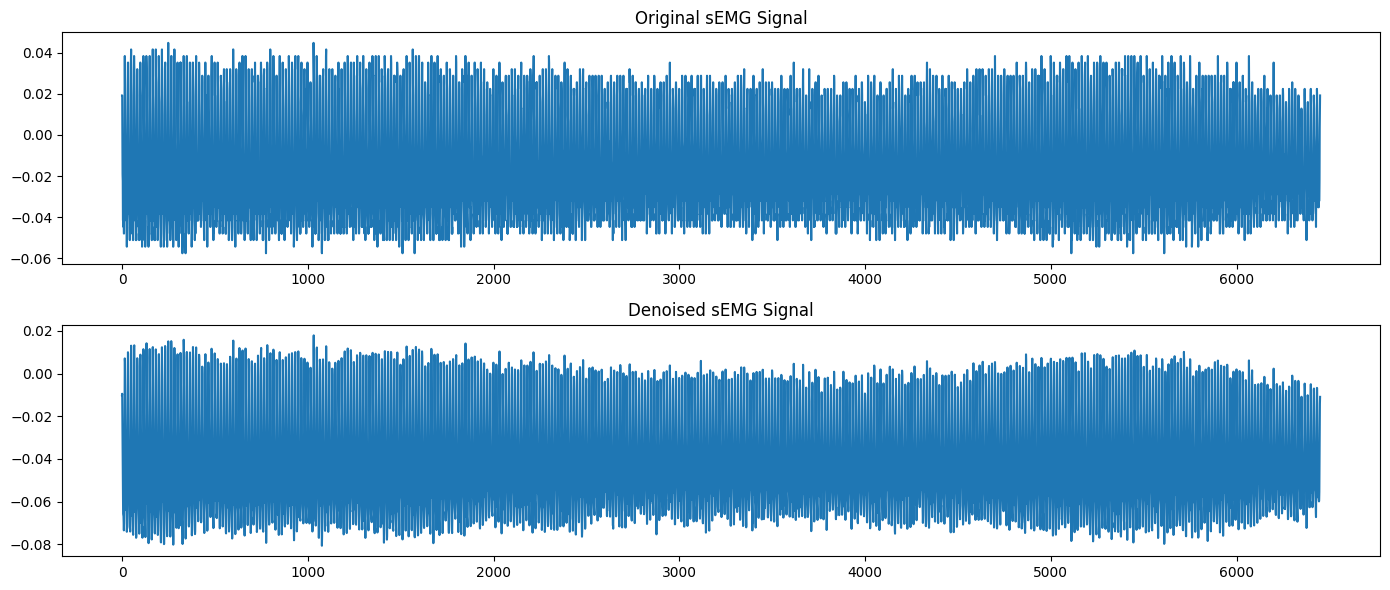

In [ ]:
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()

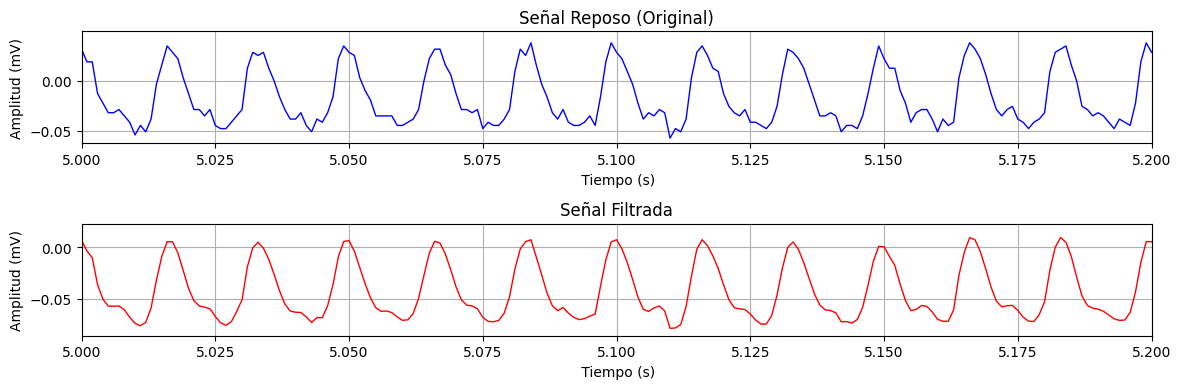

In [ ]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Reposo (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)

plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalReposo.png")
plt.show()

In [ ]:

# Calculate SNR
def calculate_snr(original_signal, denoised_signal):
    noise = original_signal - denoised_signal
    signal_power = np.sum(original_signal ** 2)
    noise_power = np.sum(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SNR pre and post filtering
snr_pre = calculate_snr(vals, np.zeros_like(vals))  # SNR of original noisy signal
snr_post = calculate_snr(vals, reconstructed_signal)  # SNR after denoising

print(f"SNR Pre-filtrado: {snr_pre:.2f} dB")
print(f"SNR Post-filtrado: {snr_post:.2f} dB")


SNR Pre-filtrado: 0.00 dB
SNR Post-filtrado: 1.64 dB


# Señal Tensión

In [ ]:
# Load your EMG signal
data = np.genfromtxt("EMG_Tension.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(1024))-0.5)*3.3)/(1009)
vals=vals*1000

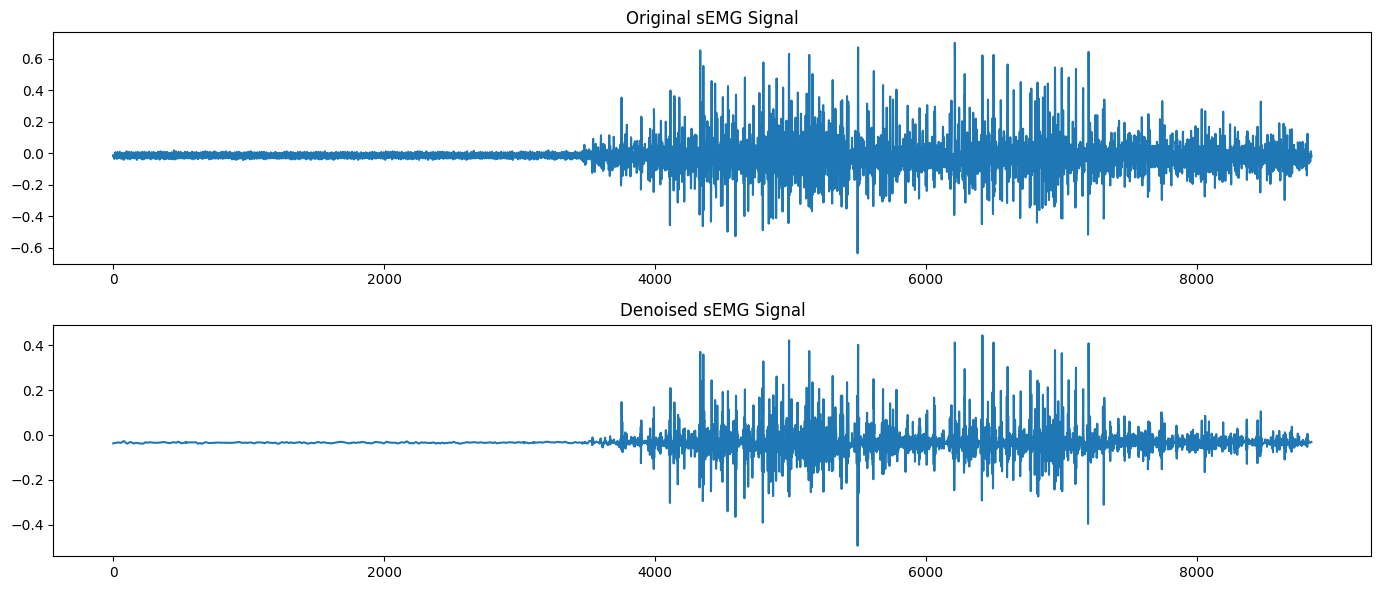

In [ ]:
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()

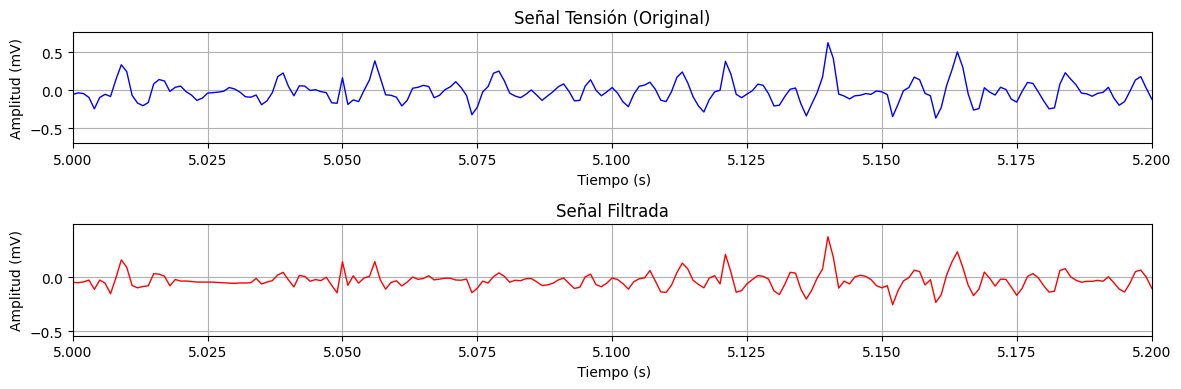

In [ ]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 5 #5 #12 #5
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Tensión (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalTensión.png")
plt.show()

In [ ]:
# Calculate SNR
def calculate_snr(original_signal, denoised_signal):
    noise = original_signal - denoised_signal
    signal_power = np.sum(original_signal ** 2)
    noise_power = np.sum(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SNR pre and post filtering
snr_pre = calculate_snr(vals, np.zeros_like(vals))  # SNR of original noisy signal
snr_post = calculate_snr(vals, reconstructed_signal)  # SNR after denoising

print(f"SNR Pre-filtrado: {snr_pre:.2f} dB")
print(f"SNR Post-filtrado: {snr_post:.2f} dB")

SNR Pre-filtrado: 0.00 dB
SNR Post-filtrado: 3.82 dB


# Señal Oposición

In [ ]:
# Load your EMG signal
data = np.genfromtxt("EMG_Oposición.txt", delimiter="\t", skip_header=2)
vals = data[:, -2]  # Assuming the EMG data is in the last column
vals=(((vals/(1024))-0.5)*3.3)/(1009)
vals=vals*1000

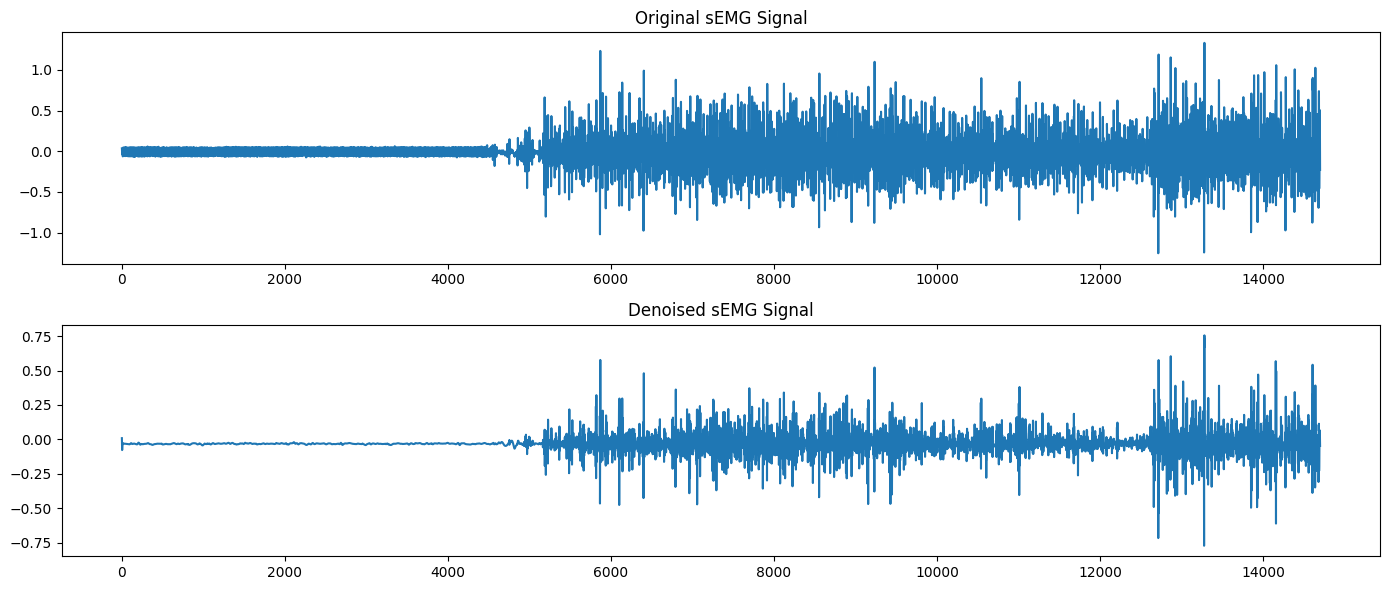

In [ ]:
# Step 1: Decompose the noised sEMG signal using the EEMD method and obtain n IMFs
eemd = EEMD()
IMFs = eemd.eemd(vals)

# Step 2: Calculate the autocorrelation function of each IMF and their normalization results
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

normalized_autocorr = [autocorr(imf) / np.max(autocorr(imf)) for imf in IMFs]

# Step 3: Calculate the variance of each normalized autocorrelation function to measure the noise component of each IMF
variances = [np.var(ac) for ac in normalized_autocorr]

# Step 4: Find the boundary IMF (ct) through the variance
threshold = np.mean(variances)  # You may need to adjust this threshold based on your data
high_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] < threshold]
low_noise_IMFs = [IMFs[i] for i in range(len(variances)) if variances[i] >= threshold]

# Step 5: Process ct using wavelet extraction and process the remaining high-frequency IMFs using an improved wavelet threshold denoising method
def wavelet_denoise(imf, wavelet='sym8', level=3):
    coeff = pywt.wavedec(imf, wavelet, mode='per')
    sigma = np.median(np.abs(coeff[-level])) / 0.6745
    uthresh = sigma * np.sqrt(2 * np.log(len(imf)))
    coeff = list(map(lambda x: pywt.threshold(x, value=uthresh, mode='soft'), coeff))
    return pywt.waverec(coeff, wavelet, mode='per')

denoised_IMFs = [wavelet_denoise(imf) for imf in high_noise_IMFs] + low_noise_IMFs

# Step 6: Reconstruct the original signal
reconstructed_signal = np.sum(denoised_IMFs, axis=0)

# Plot original and denoised signals
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(vals)
plt.title('Original sEMG Signal')
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Denoised sEMG Signal')
plt.tight_layout()
plt.show()


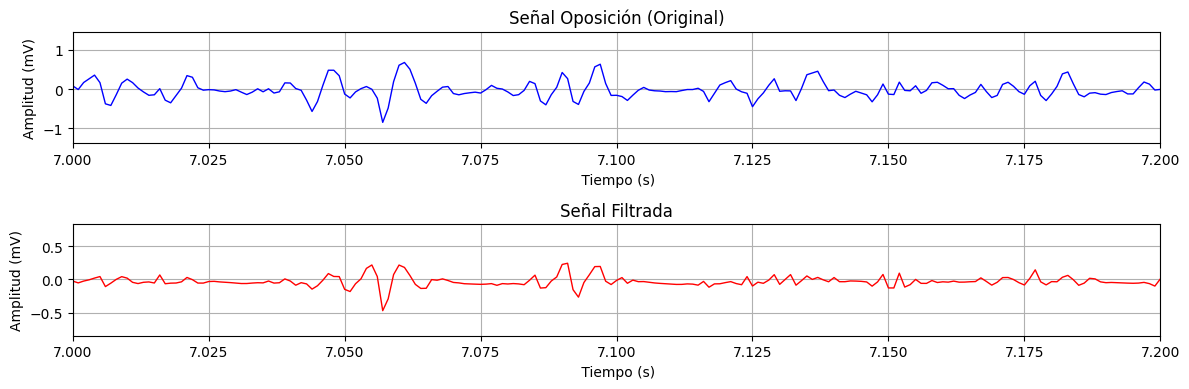

In [ ]:
#Debido a que la señal comienza en 4 segundos aproximadamente, se corta la señal en ese punto
Fs=1000#Siendo la frecuencia de muestreo del BITalino de 1000 Hz
time = np.arange(0,len(vals))/Fs


# The commented values are for Reposo, Oposición and Tensión for each column respectively
start_time= 7
plotting_window = 0.2 #0.2 #1 #1

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(time, vals, lw=1, color='blue')
# plt.xlabel('Tiempo (s)')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Oposición (Original)')
plt.grid(True)
plt.xlim(start_time, start_time + plotting_window)


plt.subplot(2, 1, 2)
plt.plot(time, reconstructed_signal, lw=1, color='red')
plt.xlabel(" Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title('Señal Filtrada')
plt.grid(True)
# plt.savefig("SeñalReposo.png")
plt.xlim(start_time, start_time + plotting_window)
plt.tight_layout()
plt.savefig("SeñalOposición.png")
plt.show()


In [ ]:
# Calculate SNR
def calculate_snr(original_signal, denoised_signal):
    noise = original_signal - denoised_signal
    signal_power = np.sum(original_signal ** 2)
    noise_power = np.sum(noise ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

# Calculate SNR pre and post filtering
snr_pre = calculate_snr(vals, np.zeros_like(vals))  # SNR of original noisy signal
snr_post = calculate_snr(vals, reconstructed_signal)  # SNR after denoising

print(f"SNR Pre-filtrado: {snr_pre:.2f} dB")
print(f"SNR Post-filtrado: {snr_post:.2f} dB")

SNR Pre-filtrado: 0.00 dB
SNR Post-filtrado: 2.15 dB
